In [51]:
import pickle
import preprocess_tweets_from_notebook
my_dict = pickle.load(open( "file.pkl", "rb"))


In [7]:
print(my_dict[0].get('text'))

['coronavirus', 'learning', 'how', 'to', 'dance', 'installment', 'in', 'this', 'series', 'if', 'focuses', 'on', 'the', 'cases', 'of', 'china', 'taiwan', 'south', 'korea', 'and', 'singapore', 'to', 'understand', 'what', 'we', 'can', 'learn', 'from', 'them', 'we', 'will', 'be', 'posting', 'the', 'next', 'installments', 'daily']


In [42]:
text = []
for entry in my_dict:
    for word in entry.get('text'):
        text.append(word)
print(text[1])

learning


In [50]:
from collections import Counter
Counter(text)

Counter({'coronavirus': 16366,
         'learning': 302,
         'how': 4210,
         'to': 44327,
         'dance': 74,
         'installment': 4,
         'in': 23077,
         'this': 12045,
         'series': 192,
         'if': 5210,
         'focuses': 6,
         'on': 12018,
         'the': 58124,
         'cases': 2889,
         'of': 26564,
         'china': 1447,
         'taiwan': 15,
         'south': 172,
         'korea': 92,
         'and': 26495,
         'singapore': 34,
         'understand': 350,
         'what': 3076,
         'we': 8817,
         'can': 3609,
         'learn': 744,
         'from': 7351,
         'them': 1735,
         'will': 5025,
         'be': 6992,
         'posting': 44,
         'next': 764,
         'installments': 1,
         'daily': 453,
         'a': 28552,
         'commission': 42,
         'should': 1581,
         'assess': 20,
         'why': 1545,
         'were': 2528,
         'americans': 1338,
         'not': 6282,
         

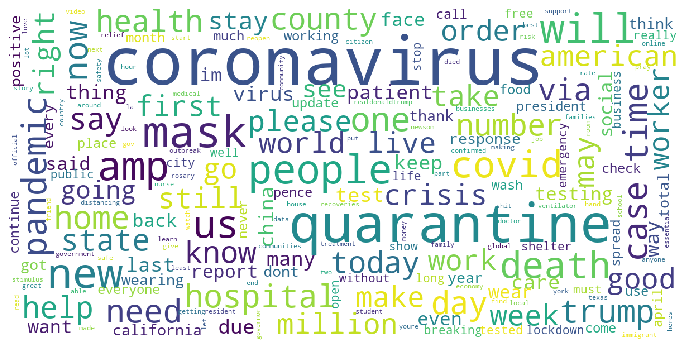

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
# print(stopwords)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        collocations=False,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
#     plt.show()

show_wordcloud(" ".join(text))
# show_wordcloud(Samsung_Reviews_positive['Reviews'])

In [52]:
# x: tweet topic score, county, retweets, likes
# y: number of cases in this county
print(my_dict[0])




{'text': ['coronavirus', 'learning', 'how', 'to', 'dance', 'installment', 'in', 'this', 'series', 'if', 'focuses', 'on', 'the', 'cases', 'of', 'china', 'taiwan', 'south', 'korea', 'and', 'singapore', 'to', 'understand', 'what', 'we', 'can', 'learn', 'from', 'them', 'we', 'will', 'be', 'posting', 'the', 'next', 'installments', 'daily'], 'date': 0, 'favorite_count': 0, 'is_retweet': True, 'county': 'Santa Clara', 'confirmed_cases': '1934'}


In [112]:
print(data['County Name'])

191          Statewide Unallocated
192     Grand Princess Cruise Ship
193                 Alameda County
194                  Alpine County
195                  Amador County
                   ...            
2818                   Wood County
2819                 Yoakum County
2820                  Young County
2821                 Zapata County
2822                 Zavala County
Name: County Name, Length: 379, dtype: object


In [232]:
import csv
import pandas as pd 
import numpy as np
from preprocess_tweets_from_notebook_george import load_freqs

freqs = load_freqs()

data = pd.read_csv("covid_confirmed_usafacts.csv") 
data = data[['County Name','State','4/14/20', '4/21/20', '4/30/20']]
data = data.loc[(data['State'] == "CA") | (data['State'] == "TX") | (data['State'] == "NY")]
print(data.head())
print(data.size)

fav_avg_w1 = np.zeros(379)
fav_avg_w2 = np.zeros(379)
fav_avg_w3 = np.zeros(379)

frequencies1 = np.zeros((379, 10))
frequencies2 = np.zeros((379, 10))
frequencies3 = np.zeros((379, 10))

for row in range(379):
    count1 = 0
    count2 = 0
    count3 = 0
    print(data.iloc[row, 0])
    for val in my_dict:
        if val.get('county') + " County" == data.iloc[row, 0]:
            if val.get('date') < 7:
                fav_avg_w1[row] += int(val.get('favorite_count'))
                frequencies1[row] += freqs[row]
                count1 +=1
            if  val.get('date') > 7 and val.get('date') < 14:
                fav_avg_w2[row] += int(val.get('favorite_count'))
                frequencies2[row] += freqs[row]
                count2 +=1
            if  val.get('date') < 14:
                fav_avg_w3[row] += int(val.get('favorite_count'))
                frequencies3[row] += freqs[row]
                count3 +=1
    if count1 != 0:
        fav_avg_w1[row] = fav_avg_w1[row] / count1
        frequencies1[row] = frequencies1[row] / count1
    if count2 != 0:
        fav_avg_w2[row] = fav_avg_w2[row] / count2
        frequencies2[row] = frequencies2[row] / count1
    if count3 != 0:
        fav_avg_w3[row] = fav_avg_w3[row] / count3
        frequencies3[row] = frequencies3[row] / count1
        
    print(fav_avg_w1[row], fav_avg_w2[row], fav_avg_w3[row])
    print(frequencies1[row], frequencies2[row], frequencies3[row])

                    County Name State  4/14/20  4/21/20  4/30/20
191       Statewide Unallocated    CA        0        0        0
192  Grand Princess Cruise Ship    CA       21       21       21
193              Alameda County    CA      884     1239     1603
194               Alpine County    CA        2        2        2
195               Amador County    CA        7        8        8
1895
Statewide Unallocated
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Grand Princess Cruise Ship
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Alameda County
0.10107893242475866 0.0 0.10107893242475866
[0.08339631 0.09449178 0.10536122 0.10169922 0.130613   0.07383652
 0.07692432 0.18905029 0.09001979 0.05460755] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.08339631 0.09449178 0.10536122 0.10169922 0.130613   0.07383652
 0.07692432 0.18905029 0.09001979 0.05460755]
Alpine County
0.0 0.0 0

0.18867924528301888 0.0 0.18867924528301888
[0.19126546 0.09443176 0.1052944  0.10163476 0.076616   0.07378969
 0.07687546 0.13555691 0.08996269 0.05457283] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.19126546 0.09443176 0.1052944  0.10163476 0.076616   0.07378969
 0.07687546 0.13555691 0.08996269 0.05457283]
San Joaquin County
0.6482758620689655 0.0 0.6482758620689655
[0.05242569 0.2968905  0.10005148 0.13181306 0.11398622 0.04641591
 0.04835847 0.08526571 0.090462   0.03433097] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.05242569 0.2968905  0.10005148 0.13181306 0.11398622 0.04641591
 0.04835847 0.08526571 0.090462   0.03433097]
San Luis Obispo County
0.5428571428571428 0.0 0.5428571428571428
[0.04750317 0.08458017 0.09061179 0.36548018 0.10483462 0.04205779
 0.07453219 0.07726027 0.08203279 0.03110707] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.04750317 0.08458017 0.09061179 0.36548018 0.10483462 0.04205779
 0.07453219 0.07726027 0.08203279 0.03110707]
San Mateo County
0.12188365650969529 0.0 0.1218836565096

0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Genesee County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Greene County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hamilton County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Herkimer County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Jefferson County
1.0466666666666666 0.0 1.0466666666666666
[0.10825189 0.15832511 0.08297241 0.20773612 0.06038492 0.05810018
 0.06054309 0.14960837 0.07100248 0.04307539] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.10825189 0.15832511 0.08297241 0.20773612 0.06038492 0.05810018
 0.06054309 0.14960837 0.07100248 0.04307539]
Kings County
0.7368421052631579 0.0 0.7368421052631579
[0.06296785 0.07134455 0.16

0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Anderson County
0.5897435897435898 0.0 0.5897435897435898
[0.0834316  0.09453169 0.10540579 0.10174222 0.07669711 0.07386778
 0.07695688 0.1357002  0.09005789 0.16160884] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.0834316  0.09453169 0.10540579 0.10174222 0.07669711 0.07386778
 0.07695688 0.1357002  0.09005789 0.16160884]
Andrews County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Angelina County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Aransas County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Archer County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Armstrong County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0

0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Crockett County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Crosby County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Culberson County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Dallam County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Dallas County
0.11244239631336406 0.0 0.11244239631336406
[0.07907669 0.08959739 0.09990393 0.14762956 0.07269371 0.07001207
 0.07293987 0.12861717 0.18775061 0.05177901] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.07907669 0.08959739 0.09990393 0.14762956 0.07269371 0.07001207
 0.07293987 0.12861717 0.18775061 0.05177901]
Dawson County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 

0.36996336996337 0.0 0.36996336996337
[0.08334371 0.09443211 0.15925629 0.10163514 0.07661629 0.12774727
 0.07687575 0.13555741 0.08996302 0.05457303] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.08334371 0.09443211 0.15925629 0.10163514 0.07661629 0.12774727
 0.07687575 0.13555741 0.08996302 0.05457303]
Hartley County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Haskell County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hays County
1.0434782608695652 0.0 1.0434782608695652
[0.08809745 0.0998183  0.16833706 0.10743218 0.08098631 0.07799877
 0.08126056 0.1432893  0.09509431 0.05768575] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.08809745 0.0998183  0.16833706 0.10743218 0.08098631 0.07799877
 0.08126056 0.1432893  0.09509431 0.05768575]
Hemphill County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Henderson County
2.404

0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
McLennan County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
McMullen County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Madison County
0.7857142857142857 0.0 0.7857142857142857
[0.09586953 0.14135452 0.1488751  0.07099857 0.09121631 0.05154696
 0.05370258 0.17008619 0.1005326  0.07581764] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.09586953 0.14135452 0.1488751  0.07099857 0.09121631 0.05154696
 0.05370258 0.17008619 0.1005326  0.07581764]
Marion County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Martin County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mason County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 

0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Schleicher County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Scurry County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shackelford County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shelby County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sherman County
0.0 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Smith County
1.210727969348659 0.0 1.210727969348659
[0.06053337 0.10767333 0.11554664 0.07372829 0.09474558 0.05355244
 0.09500112 0.09834126 0.22175658 0.07912143] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.06053337 0.10767333 0.11554664 0.07372829 0.09474558 0.05355244
 0.0950

In [171]:
print(data)

                    County Name State  4/14/20  4/21/20  4/30/20
0         Statewide Unallocated    CA        0        0        0
1    Grand Princess Cruise Ship    CA       21       21       21
2                Alameda County    CA      884     1239     1603
3                 Alpine County    CA        2        2        2
4                 Amador County    CA        7        8        8
..                          ...   ...      ...      ...      ...
374                 Wood County    TX        6        6        8
375               Yoakum County    TX        0        1        1
376                Young County    TX        3        4        4
377               Zapata County    TX        3        6        7
378               Zavala County    TX        0        1        1

[379 rows x 5 columns]


In [304]:
from sklearn.preprocessing import StandardScaler
# from sklearn_pandas import DataFrameMapper

data.reset_index(drop=True, inplace=True)

train = data[['4/14/20']] #  'County Name'
train.rename(columns = {'4/14/20':'cases'}, inplace = True)
fav_avgs_w1 = pd.DataFrame(fav_avg_w1)
# train["favorites"] = fav_avgs_w1
# for col in frequencies1:
frequencies1 = pd.DataFrame(frequencies1)
frames = [train, frequencies1]
train = pd.concat(frames, axis=1)
# train['topics'] = col
# train['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10'] = frequencies1

wk2 = data[['4/21/20']] # 'County Name'
wk2.rename(columns = {'4/21/20':'cases'}, inplace = True)
fav_avgs_w2 = pd.DataFrame(fav_avg_w2)
# wk2["favorites"] = fav_avgs_w2
frequencies2 = pd.DataFrame(frequencies2)
frames = [wk2, frequencies2]
wk2 = pd.concat(frames, axis=1)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(wk2)

train = train.append(wk2)

print(train.shape[0])
print(train.head())


# scaled_features = StandardScaler().fit_transform(train.values)
# train = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
# train.head()

# mapper = DataFrameMapper([(train.columns, StandardScaler())])
# scaled_features = mapper.fit_transform(train.copy(), 11)
# scaled_features_df = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
# print(scaled_features_df.head())

# scaler = StandardScaler()
# scaled_train = scaler.fit_transform(train)
# print(scaled_train.shape[0])
# print(scaled_train.head())

# print(scaler.fit(train))
# print("scaler mean: ", scaler.mean_)
# print(scaler.transform(train))

758
   cases         0         1         2         3         4         5  \
0      0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    884  0.083396  0.094492  0.105361  0.101699  0.130613  0.073837   
3      2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          6        7        8         9  
0  0.000000  0.00000  0.00000  0.000000  
1  0.000000  0.00000  0.00000  0.000000  
2  0.076924  0.18905  0.09002  0.054608  
3  0.000000  0.00000  0.00000  0.000000  
4  0.000000  0.00000  0.00000  0.000000  


/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [305]:
test = data[['4/30/20']] # 'County Name'
test.rename(columns = {'4/30/20':'cases'}, inplace = True)
fav_avgs_w3 = pd.DataFrame(fav_avg_w3)
# test["favorites"] = fav_avgs_w3
frequencies3 = pd.DataFrame(frequencies3)
frames = [test, frequencies3]
test = pd.concat(frames, axis=1)
print(test)

# scaled_features = StandardScaler().fit_transform(train.values)
# train = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
# train.head()


     cases         0         1         2         3         4         5  \
0        0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1       21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     1603  0.083396  0.094492  0.105361  0.101699  0.130613  0.073837   
3        2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..     ...       ...       ...       ...       ...       ...       ...   
374      8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
375      1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
376      4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
377      7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
378      1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            6        7        8         9  
0    0.000000  0.00000  0.00000  0.000000  
1    0.000000  0.00000 

In [257]:
# train = pd.get_dummies(train)
# test = pd.get_dummies(test)
# train.iloc[:,5:].head(5)

In [306]:
labels_train = np.array(train['cases'])
labels_test = np.array(test['cases'])
features_train = train.drop('cases', axis = 1)
features_test = test.drop('cases', axis = 1)

# Saving feature names for later use
feature_list = list(features_train.columns)
# Convert to numpy array
features_train = np.array(features_train)
features_test = np.array(features_test)

### Random Forest

In [307]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(features_train, labels_train);

In [308]:
# Use the forest's predict method on the test data
predictions = rf.predict(features_test)
# Calculate the absolute errors
errors = abs(predictions - labels_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 1061.44 degrees.


In [309]:
from sklearn.metrics import r2_score

print("R^2: ", r2_score(labels_test, predictions))


R^2:  0.4830565855076079


### Lasso

In [300]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(features_train, labels_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [301]:
predictions = lasso.predict(features_test)
errors = abs(predictions - labels_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1010.13 degrees.


In [302]:
print("R^2: ", r2_score(labels_test, predictions))

R^2:  -0.036991891204813054


In [303]:
print(lasso.coef_)

[-0.         -0.22362153  0.0614945   0.02850534  0.15224938  0.25347951
 -0.09450123  0.         -0.         -0.04562272]


### SVM

In [219]:
from sklearn.svm import SVR

clf = SVR(C=1.0, epsilon=0.2)
clf.fit(features_train, labels_train);

/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [220]:
# Use the forest's predict method on the test data
clf_predictions = clf.predict(features_test)
# Calculate the absolute errors
clf_errors = abs(clf_predictions - labels_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(clf_errors), 2), 'degrees.')


Mean Absolute Error: 1006.41 degrees.


In [230]:
from sklearn.metrics import r2_score
print("R^2: ", r2_score(labels_test, clf_predictions))

R^2:  -0.036245068212056974


In [225]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestRegressor()
scoring = 'r2'
results = model_selection.cross_val_score(model, features_test, labels_test, cv=kfold, scoring=scoring)
print(results.mean())
# print("R^2: %.3f (%.3f)") % (results.mean(), results.std())


/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dalelee/opt/a

-4.939618885537813


/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dalelee/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [214]:
# Calculate mean absolute percentage error (MAPE)
mape = np.zeros(len(labels_test))
for i in range(len(labels_test)):
    if labels_test[i] != 0:
        mape[i] = 100 * (errors[i] / labels_test[i])
        
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -13.63 %.


In [ ]:
counties = features[:, feature_list.index('month')]

true_data = pd.DataFrame(data = {'counties': counties, 'actual': labels})

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');





In [107]:
for row in range(379):
    currCount = 0
#     print(row)
#     print(data.iloc[row, 0])
    dataCounty = data.iloc[row, 0]
    print(dataCounty)
#     for val in my_dict:
#         currCounty = val.get('county')
    values = [int(val.get('favorite_count')) for val in my_dict if val.get('county') == dataCounty]
    
#         if county == data.iloc[row, 0]:
#             favorite_avg[row] += int(val.get('favorite_count'))
#             currCount +=1
#     favorite_avg[row] = favorite_avg[row] / currCount
    

[]


In [204]:
from preprocess_tweets_from_notebook_george import load_freqs

freqs = load_freqs()


In [209]:
print(freqs[0])
print(len(freqs))

[0.08334192, 0.094432265, 0.2132143, 0.10162664, 0.07661533, 0.07378803, 0.07687665, 0.13554578, 0.08996096, 0.05459815]
59851
